**Logistic Regression Model - Cotton Pulps Grades**  

In [1]:
# Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Package for Standardizing Data
from sklearn.preprocessing import StandardScaler

# Package for Partitioning Data
from sklearn.model_selection import train_test_split

# Package for Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Packages for Model Accuracy Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading Dataset to a pandas Dataframe
CottonPulps_data = pd.read_csv('Cotton Pulps_Factors.csv')

In [3]:
# Getting Dataset Shape
CottonPulps_data.shape

(500, 21)

In [4]:
# Count Number of Records for each Grade 
CottonPulps_data['Final Grade Letter'].value_counts()

Final Grade Letter
B    267
A    183
C     50
Name: count, dtype: int64

<Axes: xlabel='Final Grade Letter', ylabel='count'>

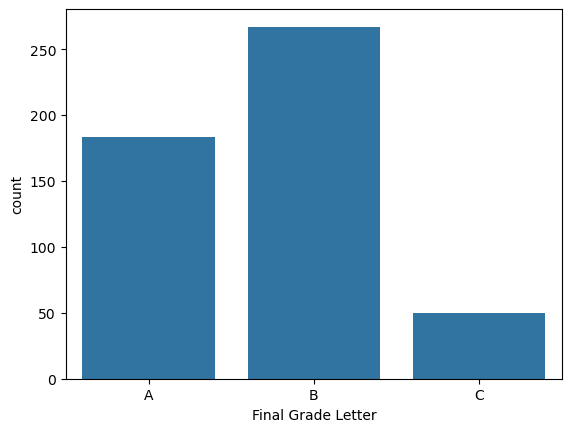

In [5]:
# Visulaizing number of Records for each Class
sns.countplot(x="Final Grade Letter" , data = CottonPulps_data)

In [6]:
# Drop Unnecessary Columns
CottonPulps_data = CottonPulps_data.iloc[:, 3:].dropna(axis=0)

In [7]:
# Define Predictors (Features)
CottonPulps_data_X = CottonPulps_data.drop(columns=['Final Grade','Final Grade Letter'], axis=1)

### Converting Categorical Variables to Numerical Variables

1) Ginning Methods: 
   For all Records are Automated ---> So, no Dummy Variable is defined for it
   
   
2) Packing Method: 

   Bails --> 0 
   Rolls --> 1

In [8]:
# Define Dummy Variables for Categorical Variables 
CottonPulps_data_X = pd.get_dummies(CottonPulps_data_X,prefix_sep='_', drop_first=True)
CottonPulps_data_X = CottonPulps_data_X.astype(int)

In [9]:
# Separating Features and Target
X = CottonPulps_data_X
Y = CottonPulps_data['Final Grade Letter']

# Data Standardization

In [10]:
# Create an Instance of Scaler
scaler = StandardScaler()

In [11]:
# Fit Scaler to Features
scaler.fit(X)

StandardScaler()

In [12]:
# Transform Features 
standardized_data = scaler.transform(X)

In [13]:
# Create a Dataframe of Standardized Features
standardized_df = pd.DataFrame(standardized_data)

In [14]:
# Define Features X & Targert Y
X = standardized_df
Y = CottonPulps_data['Final Grade Letter']

In [15]:
# Adding Target Variable to Dataset
standardized_df ['Final Grade Letter'] = CottonPulps_data['Final Grade Letter']

In [16]:
# Partition Dataset to Training, Validation, & Test Sets: Training (70%) & Validation (30%)
trainData, validData = train_test_split(standardized_df, test_size=0.30, random_state=42)
print('Training: ', trainData.shape)
print('Validation: ', validData.shape)

Training:  (350, 16)
Validation:  (150, 16)


In [17]:
# Showing Records of Features in Training Set
X_train = trainData.drop(columns=['Final Grade Letter'], axis=1)

In [18]:
# Showing Records of Target in Training Set
Y_train = trainData['Final Grade Letter']

In [19]:
# Showing Records of Features in Validation Set
X_valid = validData.drop(columns=['Final Grade Letter'], axis=1)

In [20]:
# Showing Records of Target in Validation Set
Y_valid = validData['Final Grade Letter']

## Fixing Imbalanced Classes Issue

##  SMOTE Method 

SMOTE stands for Synthetic Minority Oversampling Technique  

In [21]:
# Import Required Package 
from imblearn.over_sampling import SMOTE

In [22]:
# Initialize SMOTE
smote = SMOTE()

In [23]:
# Resample data using SMOTE 
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [24]:
# Checking the new Class Balance 
pd.Series(y_resampled).value_counts()

Final Grade Letter
A    184
B    184
C    184
Name: count, dtype: int64

In [25]:
# Initiate Logistic Regression 
model_multinomial_smote = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [26]:
# Fit the Model with Balanced Classes to Training Set
model_multinomial_smote.fit(X_resampled, y_resampled)

C:\Users\nsadeghi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [27]:
# Get Prediction for Test Data
y_pred_smote = model_multinomial_smote.predict(X_valid)

In [28]:
# Accuracy on Training Balanced Classes
X_train_smote_prediction = model_multinomial_smote.predict(X_train)
training_data_smote_accuracy = accuracy_score(X_train_smote_prediction, Y_train)

In [29]:
print('Accuracy on Training Balanced Classes: ', training_data_smote_accuracy)

Accuracy on Training Balanced Classes:  0.8942857142857142


In [30]:
# Accuracy on Validation Balanced Classes
X_valid_smote_prediction = model_multinomial_smote.predict(X_valid)
valid_data_smote_accuracy = accuracy_score(X_valid_smote_prediction, Y_valid)

In [31]:
print('Accuracy on Validation Balanced Classes: ', valid_data_smote_accuracy)

Accuracy on Validation Balanced Classes:  0.8733333333333333


# Confusion Matrix - Balanced Classes - SMOTE Method

In [32]:
# Get Prediction for Test Data
Y_pred = model_multinomial_smote.predict(X_valid)

In [33]:
# Compare Prediction Values with Actual Values
print(classification_report(Y_valid , Y_pred))

              precision    recall  f1-score   support

           A       0.87      0.90      0.89        52
           B       0.92      0.84      0.88        83
           C       0.70      0.93      0.80        15

    accuracy                           0.87       150
   macro avg       0.83      0.89      0.86       150
weighted avg       0.88      0.87      0.87       150



Text(0.5, 1.0, 'Confusion Matix - Balanced Classes with SMOTE Method')

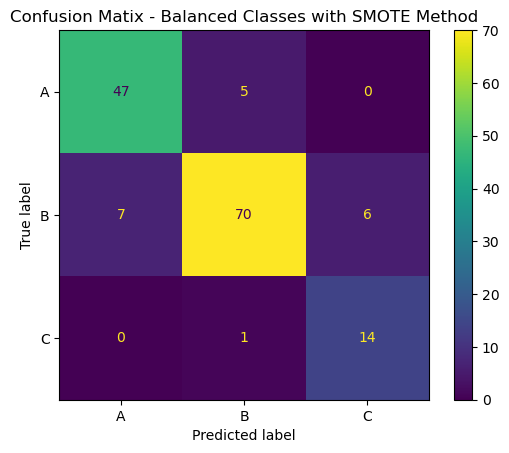

In [35]:
# Create a Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_valid, Y_pred)
plt.title("Confusion Matix - Balanced Classes with SMOTE Method")